In [1]:
import pandas as pd 
import numpy as np
import csv
import os.path
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import sklearn
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#import for scoring the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#training using logistical regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
#import
final_games_data = pd.read_csv(r'./Data/final_games_data.csv', dtype = np.array(np.dtype('float64')))

Text(0, 0.5, 'diff_cspm')

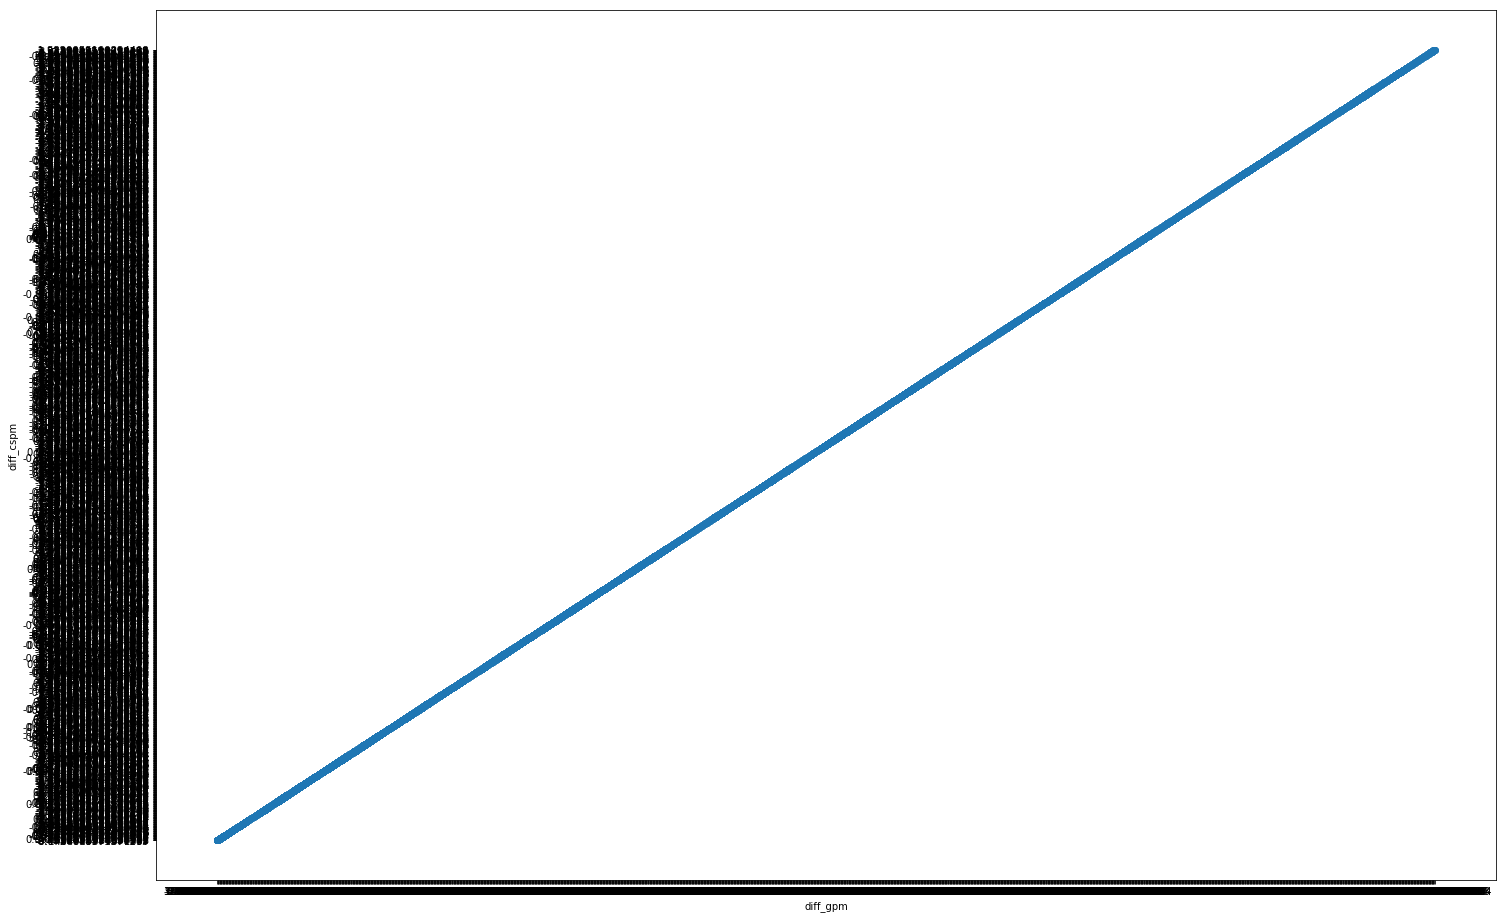

In [3]:
#plotting correlation of gpm and cspm
fig, ax = plt.subplots(figsize=(24,16))
plt.scatter(final_games_data['diff_gpm'], final_games_data['diff_cspm'])

plt.xlabel('diff_gpm')
plt.ylabel('diff_cspm')

In [4]:
#changing types to float
final_games_data['result']=final_games_data['result'].astype('float64')
final_games_data['diff_assists']=final_games_data['diff_assists'].astype('float64')
final_games_data['diff_cspm']=final_games_data['diff_cspm'].astype('float64')
final_games_data['diff_damage']=final_games_data['diff_damage'].astype('float64')
final_games_data['diff_dmgperminute']=final_games_data['diff_dmgperminute'].astype('float64')
final_games_data['diff_gpm']=final_games_data['diff_gpm'].astype('float64')
final_games_data['diff_fbaron_time']=final_games_data['diff_fbaron_time'].astype('float64')
final_games_data['diff_first_blood']=final_games_data['diff_first_blood'].astype('float64')
final_games_data['diff_firstdeath']=final_games_data['diff_firstdeath'].astype('float64')
final_games_data['diff_first_tower']=final_games_data['diff_first_tower'].astype('float64')
final_games_data['diff_match_duration']=final_games_data['diff_match_duration'].astype('float64')
final_games_data['diff_gold_spent']=final_games_data['diff_gold_spent'].astype('float64')
final_games_data['diff_herald_time']=final_games_data['diff_herald_time'].astype('float64')
final_games_data['diff_kills']=final_games_data['diff_kills'].astype('float64')
final_games_data['diff_kpm']=final_games_data['diff_kpm'].astype('float64')
final_games_data['diff_minion_kills']=final_games_data['diff_minion_kills'].astype('float64')
final_games_data['diff_drag_kills']=final_games_data['diff_drag_kills'].astype('float64')
final_games_data['diff_tower_kills']=final_games_data['diff_tower_kills'].astype('float64')
final_games_data['totalgold']=final_games_data['totalgold'].astype('float64')
final_games_data['diff_vision_wards']=final_games_data['diff_vision_wards'].astype('float64')
final_games_data['diff_wcpm'] = final_games_data['diff_wcpm'].astype('float64')
final_games_data['diff_wpm'] = final_games_data['diff_wpm'].astype('float64')
final_games_data['diff_monster_ejungle_kills'] = final_games_data['diff_monster_ejungle_kills'].astype('float64')
final_games_data['diff_monster_ojungle_kills'] = final_games_data['diff_monster_ojungle_kills'].astype('float64')

In [5]:
final_games_data

,team,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,...,diff_kpm,diff_minion_kills,diff_drag_kills,diff_tower_kills,totalgold,diff_vision_wards,diff_wcpm,diff_wpm,diff_monster_ejungle_kills,diff_monster_ojungle_kills
0,Cloud9,1.0,6.674246,0.050040,-2.518395,195.151189,82.350894,-0.165255,0.288145,-0.006883,...,0.066916,7.975398,0.224679,1.521687,2975.713061,2.015095,0.055111,-0.017894,0.978401,-1.584558
1,FlyQuest,0.0,6.674246,0.050040,-2.518395,195.151189,82.350894,-0.165255,0.288145,-0.006883,...,-0.066916,7.975398,0.224679,1.521687,2975.713061,2.015095,0.055111,-0.017894,0.978401,-1.584558
2,Team Liquid,1.0,-3.072084,-0.140403,0.770274,-128.210162,-62.089002,-1.122186,-0.666315,0.038472,...,-0.028844,-49.085356,-0.387618,-1.433292,-4363.562101,0.824219,0.028170,-0.041860,-2.318083,2.576441
3,Team SoloMid,0.0,-3.072084,-0.140403,0.770274,-128.210162,-62.089002,-1.122186,-0.666315,0.038472,...,0.028844,-49.085356,-0.387618,-1.433292,-4363.562101,0.824219,0.028170,-0.041860,-2.318083,2.576441
4,Counter Logic Gaming,1.0,4.721981,-2.702575,2.078135,231.150648,31.252044,0.481017,-0.867412,1.165162,...,0.075092,-73.493692,0.156385,0.337577,57.178096,-5.625813,-0.193733,0.103653,16.218460,-23.743034
5,100 Thieves,0.0,4.721981,-2.702575,2.078135,231.150648,31.252044,0.481017,-0.867412,1.165162,...,-0.075092,-73.493692,0.156385,0.337577,57.178096,-5.625813,-0.193733,0.103653,16.218460,-23.743034
6,Clutch Gaming,0.0,2.002217,0.629270,0.234294,33.544572,8.289062,-0.313402,-0.994154,-0.809631,...,0.014854,-7.209904,-0.098300,-0.497413,-1302.296378,-1.434959,-0.071929,0.073978,-1.686992,-0.530303
7,OpTic Gaming,1.0,2.002217,0.629270,0.234294,33.544572,8.289062,-0.313402,-0.994154,-0.809631,...,-0.014854,-7.209904,-0.098300,-0.497413,-1302.296378,-1.434959,-0.071929,0.073978,-1.686992,-0.530303
8,Golden Guardians,1.0,0.398504,2.304662,-1.459402,-24.200711,13.996141,-0.217293,0.027761,-0.409342,...,0.000653,57.817308,0.335470,-0.378205,-28.498932,9.849359,0.154870,0.384814,-18.871795,8.606838
9,Echo Fox,0.0,0.398504,2.304662,-1.459402,-24.200711,13.996141,-0.217293,0.027761,-0.409342,...,-0.000653,57.817308,0.335470,-0.378205,-28.498932,9.849359,0.154870,0.384814,-18.871795,8.606838


In [6]:
#original correlation
final_games_data_corr = final_games_data.corr()

final_games_data_corr

,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,...,diff_kpm,diff_minion_kills,diff_drag_kills,diff_tower_kills,totalgold,diff_vision_wards,diff_wcpm,diff_wpm,diff_monster_ejungle_kills,diff_monster_ojungle_kills
result,1.000000,0.000000,0.000000,0.000000,0.000000,-0.000013,0.000000,0.000000,0.000000,0.000000,...,0.30753,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
diff_assists,0.000000,1.000000,0.143379,-0.455422,0.774967,0.848375,-0.106506,-0.093594,0.064244,-0.097099,...,0.00000,-0.031938,0.585523,0.855206,0.515047,-0.048913,0.134502,0.129582,0.313353,-0.028858
diff_cspm,0.000000,0.143379,1.000000,-0.550338,0.039378,0.498884,-0.016563,0.046380,-0.254201,0.620142,...,0.00000,0.415360,0.419669,0.372329,0.187249,0.539274,0.570835,0.374645,-0.246588,0.535952
diff_damage,0.000000,-0.455422,-0.550338,1.000000,-0.203787,-0.634008,-0.075346,-0.304207,0.058124,-0.162355,...,0.00000,-0.285322,-0.498182,-0.658456,-0.400134,-0.252561,-0.386756,-0.362153,-0.034963,-0.246590
diff_dmgperminute,0.000000,0.774967,0.039378,-0.203787,1.000000,0.732807,0.003628,-0.058782,0.270043,-0.151449,...,0.00000,0.099529,0.475514,0.734911,0.574772,-0.255787,0.069568,0.035766,0.394236,-0.085479
diff_gpm,-0.000013,0.848375,0.498884,-0.634008,0.732807,1.000000,-0.096866,-0.052015,0.026464,0.086503,...,0.00000,0.121965,0.711032,0.950829,0.544796,0.025810,0.325351,0.208415,0.274858,0.095237
diff_fbaron_time,0.000000,-0.106506,-0.016563,-0.075346,0.003628,-0.096866,1.000000,0.383258,0.103049,-0.064299,...,0.00000,0.626765,0.040022,-0.009615,0.525250,0.162823,0.311609,0.215893,0.135053,0.276974
diff_first_blood,0.000000,-0.093594,0.046380,-0.304207,-0.058782,-0.052015,0.383258,1.000000,0.082763,-0.041313,...,0.00000,0.456854,0.086326,0.041471,0.338555,0.090293,0.369563,0.255407,0.004081,0.262395
diff_firstdeath,0.000000,0.064244,-0.254201,0.058124,0.270043,0.026464,0.103049,0.082763,1.000000,-0.171659,...,0.00000,0.148838,-0.341584,0.043328,0.207193,-0.248371,-0.181258,0.013499,0.440384,-0.465264
diff_first_tower,0.000000,-0.097099,0.620142,-0.162355,-0.151449,0.086503,-0.064299,-0.041313,-0.171659,1.000000,...,0.00000,0.214035,0.153692,-0.005889,-0.083341,0.563572,0.296475,0.218574,-0.251841,0.211091


In [5]:
#A fit ols estimation
def fit_ols(x,y):
    model = sm.OLS(y,x)
    results = model.fit()
    return results.summary()

In [6]:
#generate x and y column
def generate_x_y(df, target):
    X = df.loc[:, df.columns != target].values
    Y = df.loc[:, df.columns == target].values
    return X,Y

In [7]:
final_games_data

,team,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,...,diff_gold_spent,diff_herald_time,diff_kills,diff_kpm,diff_minion_kills,diff_drag_kills,diff_tower_kills,totalgold,diff_vision_wards,diff_monster_kills
0,Cloud9,1.0,7.610320,-0.672605,-2.092956,249.181623,91.919914,-0.261800,-0.139876,0.255898,...,1557.200491,-3.512596,3.018591,0.091302,-13.536093,0.234395,1.748940,3131.145726,0.554753,-7.785939
1,FlyQuest,0.0,7.610320,-0.672605,-2.092956,249.181623,91.919914,-0.261800,-0.139876,0.255898,...,1557.200491,-3.512596,3.018591,-0.091302,-13.536093,0.234395,1.748940,3131.145726,0.554753,-7.785939
2,Team Liquid,1.0,-3.072084,-0.140403,0.770274,-128.210162,-62.089002,-1.122186,-0.666315,0.038472,...,-3234.579403,0.611744,-1.308331,-0.028844,-49.085356,-0.387618,-1.433292,-4363.562101,0.824219,2.724735
3,Team SoloMid,0.0,-3.072084,-0.140403,0.770274,-128.210162,-62.089002,-1.122186,-0.666315,0.038472,...,-3234.579403,0.611744,-1.308331,0.028844,-49.085356,-0.387618,-1.433292,-4363.562101,0.824219,2.724735
4,Counter Logic Gaming,1.0,4.721981,-2.702575,2.078135,231.150648,31.252044,0.481017,-0.867412,1.165162,...,-414.123336,-4.611943,2.515248,0.075092,-73.493692,0.156385,0.337577,57.178096,-5.625813,-38.473026
5,100 Thieves,0.0,4.721981,-2.702575,2.078135,231.150648,31.252044,0.481017,-0.867412,1.165162,...,-414.123336,-4.611943,2.515248,-0.075092,-73.493692,0.156385,0.337577,57.178096,-5.625813,-38.473026
6,Clutch Gaming,0.0,2.002217,0.629270,0.234294,33.544572,8.289062,-0.313402,-0.994154,-0.809631,...,-1211.743533,0.361095,0.477827,0.014854,-7.209904,-0.098300,-0.497413,-1302.296378,-1.434959,-4.773466
7,OpTic Gaming,1.0,2.002217,0.629270,0.234294,33.544572,8.289062,-0.313402,-0.994154,-0.809631,...,-1211.743533,0.361095,0.477827,-0.014854,-7.209904,-0.098300,-0.497413,-1302.296378,-1.434959,-4.773466
8,Golden Guardians,1.0,0.398504,2.304662,-1.459402,-24.200711,13.996141,-0.217293,0.027761,-0.409342,...,-544.036325,3.201755,-0.116453,0.000653,57.817308,0.335470,-0.378205,-28.498932,9.849359,15.346154
9,Echo Fox,0.0,0.398504,2.304662,-1.459402,-24.200711,13.996141,-0.217293,0.027761,-0.409342,...,-544.036325,3.201755,-0.116453,-0.000653,57.817308,0.335470,-0.378205,-28.498932,9.849359,15.346154


In [8]:
def generate_vif(df, target):
    X_var = add_constant(df.loc[:, df.columns != target])
    return pd.Series(
        [variance_inflation_factor(X_var.values, i) for i in range(X_var.shape[1])],
        index=X_var.columns,
    )

In [9]:
#x,y = generate_x_y(final_games_data, target, team)
data_set = final_games_data.loc[:, final_games_data.columns != 'team']
target = 'result'
series = generate_vif(data_set, target)
list_remove = []
for i in series.index:
    if(series[i] >= 5):
        list_remove.append(i)

/Applications/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
print(list_remove)

['diff_assists', 'diff_cspm', 'diff_dmgperminute', 'diff_gpm', 'diff_match_duration', 'diff_gold_spent', 'diff_kills', 'diff_minion_kills', 'diff_tower_kills', 'totalgold', 'diff_monster_kills']


In [11]:
x,y = generate_x_y(data_set, target)
index = 1
for i in data_set.columns:
    if(i == 'result'):
        continue
    print(index, ':', i)
    index += 1

1 : diff_assists
2 : diff_cspm
3 : diff_damage
4 : diff_dmgperminute
5 : diff_gpm
6 : diff_fbaron_time
7 : diff_first_blood
8 : diff_firstdeath
9 : diff_first_tower
10 : diff_match_duration
11 : diff_gold_spent
12 : diff_herald_time
13 : diff_kills
14 : diff_kpm
15 : diff_minion_kills
16 : diff_drag_kills
17 : diff_tower_kills
18 : totalgold
19 : diff_vision_wards
20 : diff_monster_kills


In [12]:
print(fit_ols(x,y))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     38.83
Date:                Fri, 09 Aug 2019   Prob (F-statistic):          1.60e-147
Time:                        23:13:34   Log-Likelihood:                -15529.
No. Observations:               14834   AIC:                         3.110e+04
Df Residuals:                   14814   BIC:                         3.125e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0005      0.005     -0.098      0.9

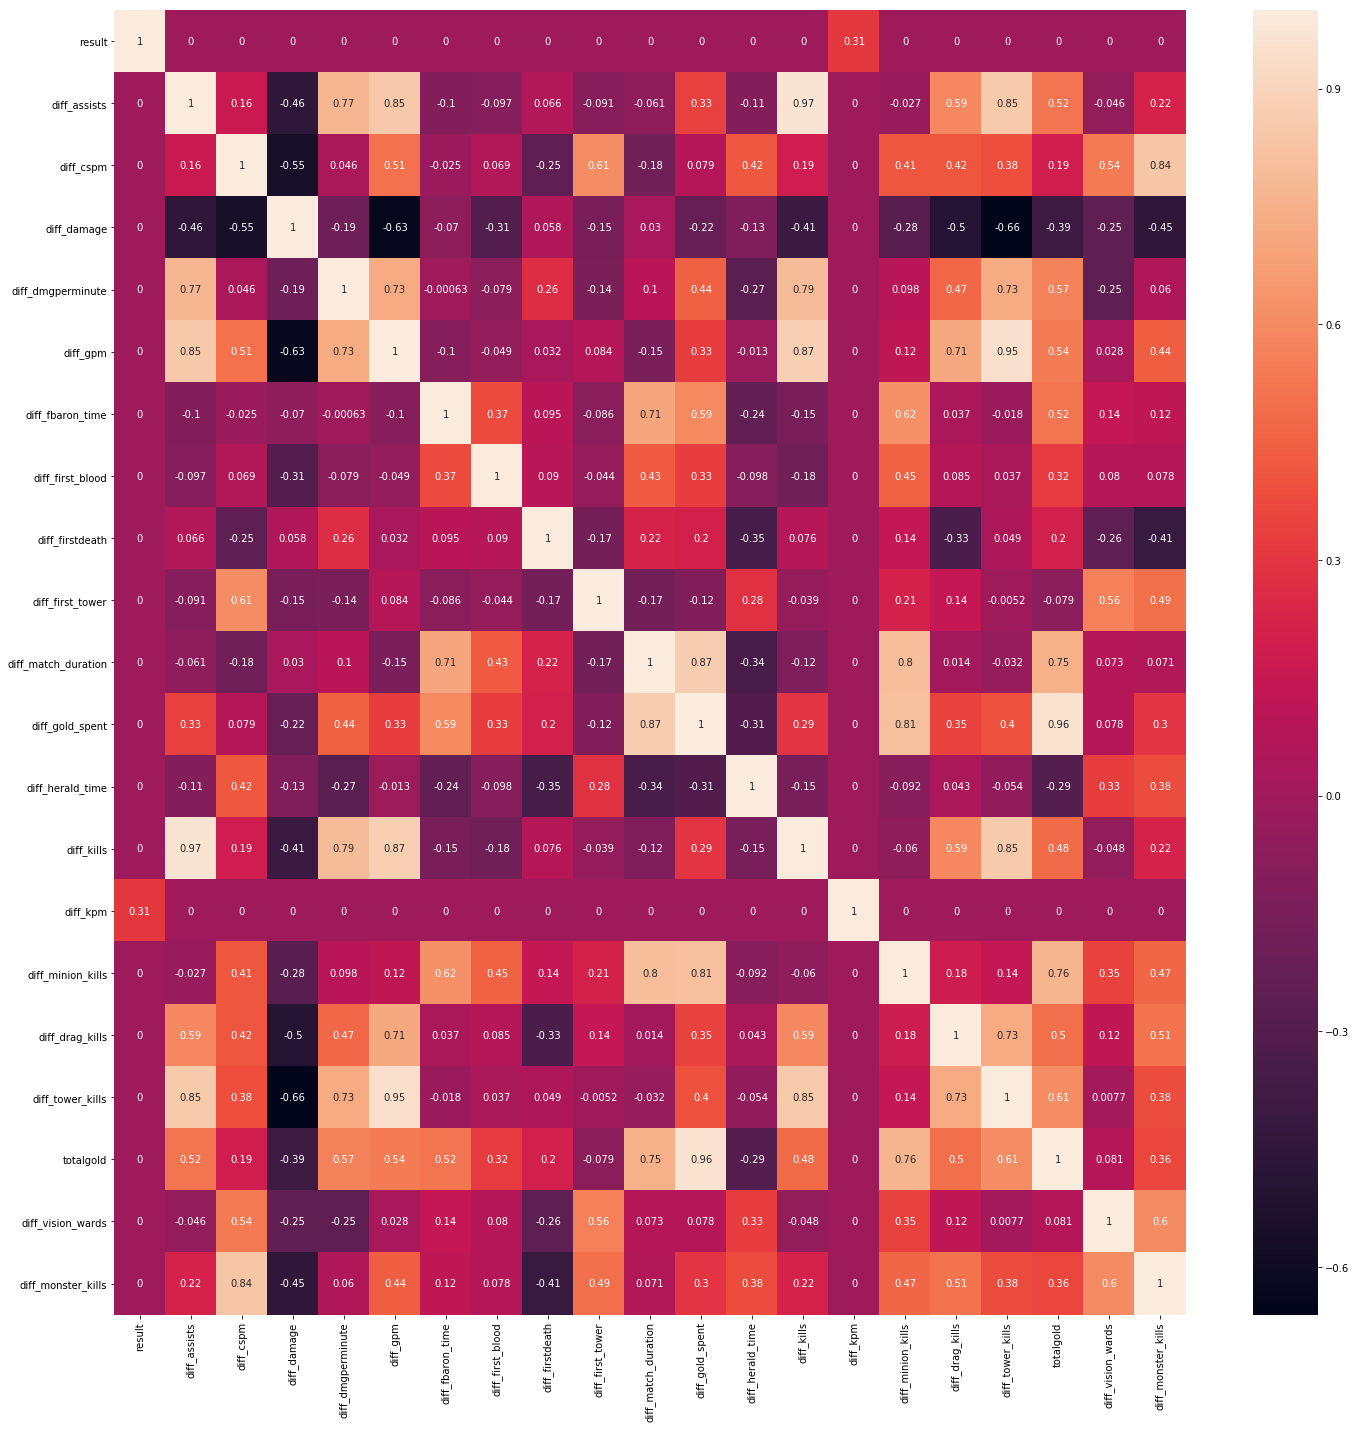

In [15]:
fig, ax = plt.subplots(figsize = (24,24))
sns.heatmap(final_games_data_corr, annot = True)

In [16]:
#droping colinear col
#final_games_data.drop(['diff_assists','diff_monster_kills','diff_cspm','diff_damage','diff_minion_kills','diff_kills','totalgold'], inplace=True, axis=1)
#final_games_data.drop(['diff_tower_kills'], inplace=True, axis=1)
for i in list_remove:
    final_games_data.drop([i], inplace = True, axis = 1)

In [17]:
#looking at correlation for each col
final_games_data_corr = final_games_data.corr()

final_games_data_corr

,result,diff_damage,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,diff_herald_time,diff_kpm,diff_drag_kills,diff_vision_wards
result,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.311683,0.000000,0.000000
diff_damage,0.000000,1.000000,-0.070166,-0.309296,0.057923,-0.150056,-0.127117,0.000000,-0.497835,-0.250073
diff_fbaron_time,0.000000,-0.070166,1.000000,0.371271,0.095373,-0.086164,-0.242100,0.000000,0.037275,0.140851
diff_first_blood,0.000000,-0.309296,0.371271,1.000000,0.090495,-0.043630,-0.098480,0.000000,0.085422,0.079572
diff_firstdeath,0.000000,0.057923,0.095373,0.090495,1.000000,-0.165501,-0.351312,0.000000,-0.332745,-0.257194
diff_first_tower,0.000000,-0.150056,-0.086164,-0.043630,-0.165501,1.000000,0.284492,0.000000,0.140136,0.561846
diff_herald_time,0.000000,-0.127117,-0.242100,-0.098480,-0.351312,0.284492,1.000000,0.000000,0.043075,0.328647
diff_kpm,0.311683,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
diff_drag_kills,0.000000,-0.497835,0.037275,0.085422,-0.332745,0.140136,0.043075,0.000000,1.000000,0.119428
diff_vision_wards,0.000000,-0.250073,0.140851,0.079572,-0.257194,0.561846,0.328647,0.000000,0.119428,1.000000


In [18]:
new_data_set = final_games_data.loc[:, final_games_data.columns != 'team']
target = 'result'
new_x, new_y = generate_x_y(new_data_set, target)
print(fit_ols(new_x, new_y))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     85.30
Date:                Fri, 09 Aug 2019   Prob (F-statistic):          2.39e-155
Time:                        23:14:11   Log-Likelihood:                -15533.
No. Observations:               14834   AIC:                         3.108e+04
Df Residuals:                   14825   BIC:                         3.115e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0060      0.003     -1.775      0.0

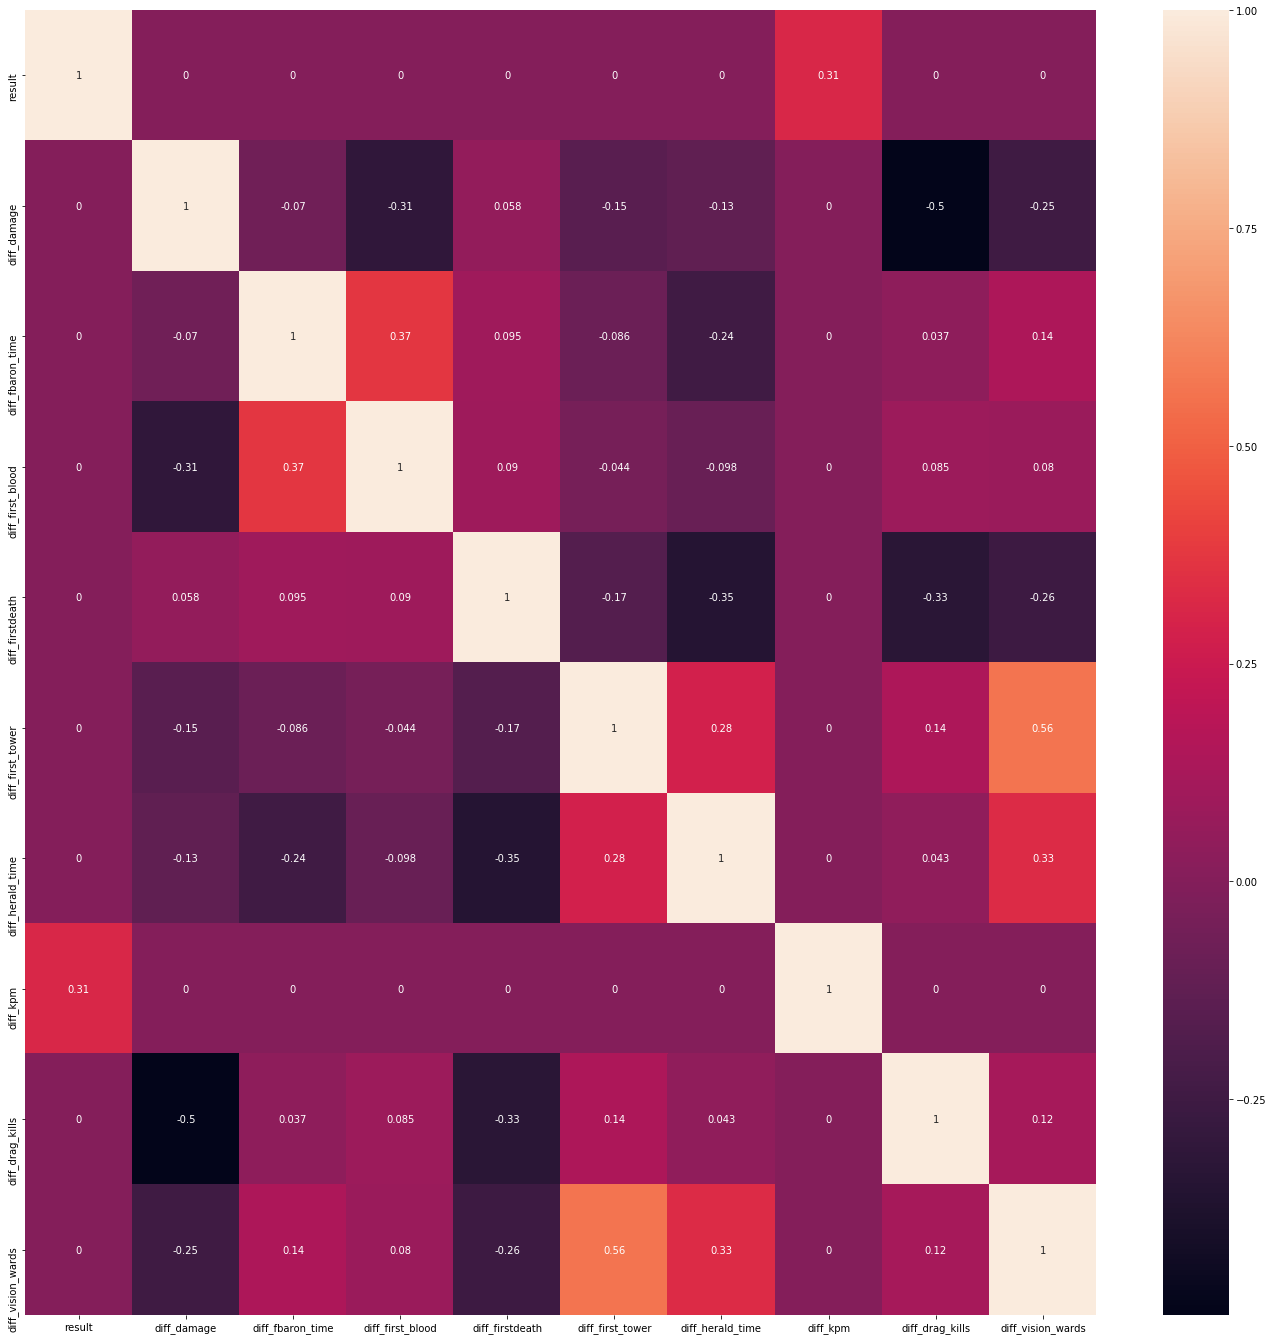

In [19]:
#correlation of each var with each other
fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(final_games_data_corr, annot=True)

In [7]:
#convert teams into one hot encoding
le = preprocessing.LabelEncoder()
final_games_data = pd.get_dummies(final_games_data, columns=['team']);
final_games_data.head()

,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,...,team_Virtus.pro,team_Vitality,team_Vivo Keyd,team_Wayi Spider,team_Wind and Rain,team_Young Generation,team_YouthCREW,team_eUnited,team_eXtreme Gamers,team_paiN Gaming
0,1.0,6.674246,0.050040,-2.518395,195.151189,82.350894,-0.165255,0.288145,-0.006883,-0.882297,...,0,0,0,0,0,0,0,0,0,0
1,0.0,6.674246,0.050040,-2.518395,195.151189,82.350894,-0.165255,0.288145,-0.006883,-0.882297,...,0,0,0,0,0,0,0,0,0,0
2,1.0,-3.072084,-0.140403,0.770274,-128.210162,-62.089002,-1.122186,-0.666315,0.038472,0.084633,...,0,0,0,0,0,0,0,0,0,0
3,0.0,-3.072084,-0.140403,0.770274,-128.210162,-62.089002,-1.122186,-0.666315,0.038472,0.084633,...,0,0,0,0,0,0,0,0,0,0
4,1.0,4.721981,-2.702575,2.078135,231.150648,31.252044,0.481017,-0.867412,1.165162,-2.247426,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#splitting data to train
X= final_games_data.drop('result', axis=1)
Y= final_games_data['result']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [9]:
#shape of train data
x_train.shape, y_train.shape

((11867, 196), (11867,))

In [10]:
##shape of test data
x_test.shape, y_test.shape

((2967, 196), (2967,))

In [11]:
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)

In [12]:
#prediction using the logistical model from prev cell
y_pred = logistic_model.predict(x_test)

In [13]:
#create dataframe of results
pred_results = pd.DataFrame({'y_test': y_test,
                            'y_pred': y_pred})

In [14]:
#total right and wrong of results
final_games_data_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)
final_games_data_crosstab

y_test,0.0,1.0
y_pred,,
0.0,885,536
1.0,575,971


In [17]:
#scores
acc = accuracy_score(y_test, y_pred) #how many of the predicated values did the model get right
prec = precision_score(y_test, y_pred) #how many of the teams that the model thought won actually won
recall = recall_score(y_test, y_pred) #how many of the actual outcomes did the model correctly predict

print("accuracy_score: ", acc)
print("precision_score: ", prec)
print("recall_score: ", recall) #many false negatives

accuracy_score:  0.6255476912706438
precision_score:  0.628072445019405
recall_score:  0.6443264764432648


In [43]:
final_games_data = final_games_data.sample(frac=1).reset_index(drop=True)
final_games_data.head()

,result,diff_assists,diff_cspm,diff_damage,diff_dmgperminute,diff_gpm,diff_fbaron_time,diff_first_blood,diff_firstdeath,diff_first_tower,...,team_Vitality,team_Vivo Keyd,team_Wayi Spider,team_Wind and Rain,team_Young Generation,team_YouthCREW,team_eUnited,team_eXtreme Gamers,team_eXtreme Gamers eSports Club,team_paiN Gaming
0,0.0,-5.640252,-0.216647,3.068223,-305.014472,-94.211990,-3.081601,0.510768,-2.066110,1.967086,...,0,0,0,0,0,0,0,0,0,0
1,0.0,-4.294425,-1.954288,3.668990,-55.227583,-71.129279,0.018387,-1.734837,0.832470,0.346700,...,0,0,0,0,0,0,0,0,0,0
2,0.0,6.234848,0.372891,-2.866162,132.460917,40.613656,-1.346665,0.450669,0.406199,-1.886650,...,0,0,0,0,0,0,0,0,0,0
3,1.0,0.940291,-2.590998,0.295164,-61.190132,-48.347527,1.520456,-0.488700,-2.460639,-4.213940,...,0,0,0,0,0,0,0,0,0,0
4,1.0,-6.713050,-0.650174,-0.935112,-278.979422,-115.290844,-3.959104,0.012451,-1.282557,-0.953200,...,0,0,0,0,0,0,0,0,0,0
